# 实例：实现一元逻辑回归

### sigmoid()函数

In [1]:
import tensorflow as tf
print("TensorFlow version:",tf.__version__)

TensorFlow version: 2.5.0-rc3


In [2]:
import numpy as np

In [3]:
x=np.array([1.,2.,3.,4.])

In [4]:
w=tf.Variable(1.)
b=tf.Variable(1.)

In [5]:
1/(1+tf.exp(-(w*x+b)))

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.880797  , 0.95257413, 0.98201376, 0.9933072 ], dtype=float32)>

### 交叉熵损失函数

In [6]:
y=np.array([0,0,1,1])
pred=np.array([0.1,0.2,0.8,0.49])

In [7]:
1-y

array([1, 1, 0, 0])

In [8]:
1-pred

array([0.9 , 0.8 , 0.2 , 0.51])

In [9]:
-tf.reduce_sum(y*tf.math.log(pred)+(1-y)*tf.math.log(1-pred))

<tf.Tensor: shape=(), dtype=float64, numpy=1.2649975061637104>

In [10]:
-tf.reduce_mean(y*tf.math.log(pred)+(1-y)*tf.math.log(1-pred))

<tf.Tensor: shape=(), dtype=float64, numpy=0.3162493765409276>

### 准确率

In [11]:
y=np.array([0,0,1,1])
pred=np.array([0.1,0.2,0.8,0.49])

In [12]:
tf.round(pred)#四舍五入函数

<tf.Tensor: shape=(4,), dtype=float64, numpy=array([0., 0., 1., 0.])>

In [13]:
tf.equal(tf.round(pred),y)#逐个比较预测值和标签值

<tf.Tensor: shape=(4,), dtype=bool, numpy=array([ True,  True,  True, False])>

In [14]:
tf.cast(tf.equal(tf.round(pred),y),tf.int8)#改变数据类型

<tf.Tensor: shape=(4,), dtype=int8, numpy=array([1, 1, 1, 0], dtype=int8)>

In [15]:
tf.reduce_mean(tf.cast(tf.equal(tf.round(pred),y),tf.float32))
#对所有元素求平均值

<tf.Tensor: shape=(), dtype=float32, numpy=0.75>

In [16]:
tf.round(0.5)#参数值为0.5返回0

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [17]:
tf.round(0.5000001)#参数值大于0.5，返回1

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

### where ( condition, a, b ）

In [18]:
pred=np.array([0.1,0.2,0.8,0.49])

In [19]:
tf.where(pred<0.5,0,1)

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 0, 1, 0])>

In [20]:
pred<0.5

array([ True,  True, False,  True])

In [21]:
tf.where(pred<0.4,0,1)

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 0, 1, 1])>

In [22]:
pred=np.array([0.1,0.2,0.8,0.49])
a=np.array([1,2,3,4])
b=np.array([10,20,30,40])

In [23]:
tf.where(pred<0.5,a,b)

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 1,  2, 30,  4])>

In [24]:
tf.where(pred>=0.5)#参数大于等于0.5的索引

<tf.Tensor: shape=(1, 1), dtype=int64, numpy=array([[2]], dtype=int64)>

In [25]:
y=np.array([0,0,1,1])
pred=np.array([0.1,0.2,0.8,0.49])

In [26]:
tf.reduce_mean(tf.cast(tf.equal(tf.where(pred<0.5,0,1),y),tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=0.75>

## 房屋销售记录

### 加载数据

In [27]:
import tensorflow as tf
print("TensorFlow version:",tf.__version__)

TensorFlow version: 2.5.0-rc3


In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
x=np.array([137.97,104.50,100.00,126.32,79.20,99.00,124.00,114.00,
            106.69,140.05,53.75,46.91,68.00,63.02,81.26,86.21])
y=np.array([1,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0])

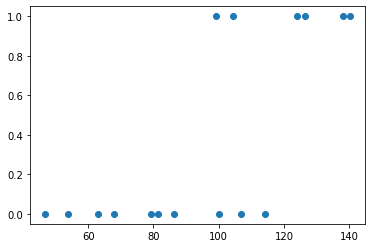

In [30]:
plt.scatter(x,y)

### 数据处理

In [31]:
x_train=x-np.mean(x)
y_train=y

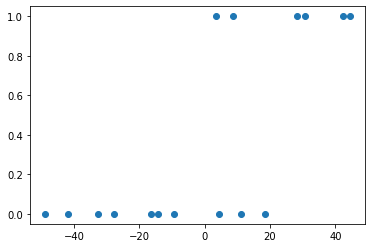

In [32]:
plt.scatter(x_train,y_train)

### 设置超参数

In [33]:
learn_rate=0.005
iter=5
display_step=1

In [34]:
np.random.seed(612)
w=tf.Variable(np.random.randn())
b=tf.Variable(np.random.randn())

### 训练模型

In [38]:
cross_train=[]#存放训练集的交叉熵损失
acc_train=[]#存放训练集的分类准确率

for i in range(0,iter+1):
    
    with tf.GradientTape() as tape:
        pred_train=1/(1+tf.exp(-(w*x_train+b)))#计算sigmoid函数
        Loss_train=-tf.reduce_mean(y_train*tf.math.log(pred_train)
                                   +(1-y_train)*tf.math.log(1-pred_train))
        Accuracy_train=tf.reduce_mean(tf.cast(tf.equal(tf.where(
                                    pred_train<0.5,0,1),y_train),tf.float32))
        
    cross_train.append(Loss_train)
    acc_train.append(Accuracy_train)
    
    dL_dw,dL_db=tape.gradient(Loss_train,[w,b])
    
    w.assign_sub(learn_rate*dL_dw)
    b.assign_sub(learn_rate*dL_db)
    
    if i % display_step==0:
        print("i:%i,Train Loss:%f,Accuracy:%f"%(i,Loss_train,Accuracy_train))

i:0,Train Loss:0.306770,Accuracy:0.812500
i:1,Train Loss:0.305152,Accuracy:0.812500
i:2,Train Loss:0.304122,Accuracy:0.812500
i:3,Train Loss:0.303447,Accuracy:0.812500
i:4,Train Loss:0.302995,Accuracy:0.812500
i:5,Train Loss:0.302688,Accuracy:0.812500


### 使用初始权值时的sigmoid函数

In [41]:
np.random.seed(612)
w=tf.Variable(np.random.randn())
b=tf.Variable(np.random.randn())

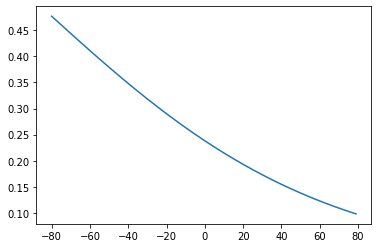

In [42]:
x_=range(-80,80)
y_=1/(1+tf.exp(-(w*x_+b)))
plt.plot(x_,y_)

### 可视化

i:0,Train Loss:0.852807,Accuarcy:0.625000
i:1,Train Loss:0.400259,Accuarcy:0.875000
i:2,Train Loss:0.341504,Accuarcy:0.812500
i:3,Train Loss:0.322571,Accuarcy:0.812500
i:4,Train Loss:0.313972,Accuarcy:0.812500
i:5,Train Loss:0.309411,Accuarcy:0.812500


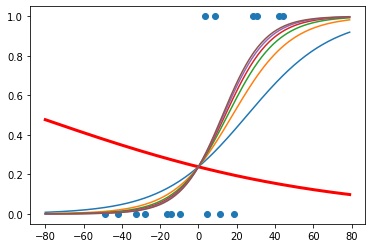

In [43]:
plt.scatter(x_train,y_train)
plt.plot(x_,y_,color="red",linewidth=3)

cross_train=[]
acc_train=[]

for i in range(0,iter+1):
    with tf.GradientTape() as tape:
        pred_train=1/(1+tf.exp(-(w*x_train+b)))
        Loss_train=-tf.reduce_mean(y_train*tf.math.log(pred_train)+(1-y_train)*tf.math.log(1-pred_train))
        Accuracy_train=tf.reduce_mean(tf.cast(tf.equal(tf.where(pred_train<0.5,0,1),y_train),tf.float32))
        
    cross_train.append(Loss_train)
    acc_train.append(Accuracy_train)
    
    dL_dw,dL_db=tape.gradient(Loss_train,[w,b])
    
    w.assign_sub(learn_rate*dL_dw)
    b.assign_sub(learn_rate*dL_db)
    
    if i % display_step==0:
        print("i:%i,Train Loss:%f,Accuarcy:%f"%(i,Loss_train,Accuracy_train))
        y_=1/(1+tf.exp(-(w*x_+b)))
        plt.plot(x_,y_)

In [44]:
x_test=[128.15,45.00,141.43,106.27,99.00,53.84,85.36,70.00,162.00,114.60]

In [45]:
pred_test=1/(1+tf.exp(-(w*(x_test-np.mean(x))+b)))

In [46]:
y_test=tf.where(pred_test<0.5,0,1)
for i in range (len(x_test)):
    print(x_test[i],"\t",pred_test[i].numpy(),"\t",y_test[i].numpy(),"\t")

128.15 	 0.8610252 	 1 	
45.0 	 0.0029561974 	 0 	
141.43 	 0.9545566 	 1 	
106.27 	 0.45318928 	 0 	
99.0 	 0.2981362 	 0 	
53.84 	 0.00663888 	 0 	
85.36 	 0.108105935 	 0 	
70.0 	 0.028681064 	 0 	
162.0 	 0.9928677 	 1 	
114.6 	 0.6406205 	 1 	


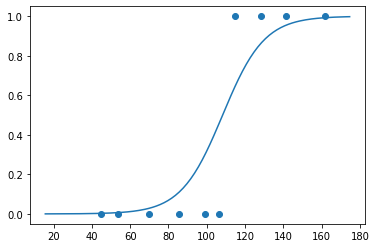

In [48]:
plt.scatter(x_test,y_test)

x_=np.array(range(-80,80))
y_=1/(1+tf.exp(-(w*x_+b)))
plt.plot(x_+np.mean(x),y_)
plt.show()